<a href="https://colab.research.google.com/github/pragnadeepak/Yolov8EmotionDetection/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Aug 30 05:34:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.166 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

## CLI

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 75.0MB/s]
Ultralytics YOLOv8.0.166 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 88.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 79.7ms
Speed: 13.6ms preprocess, 79.7ms inference, 18.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict


/content


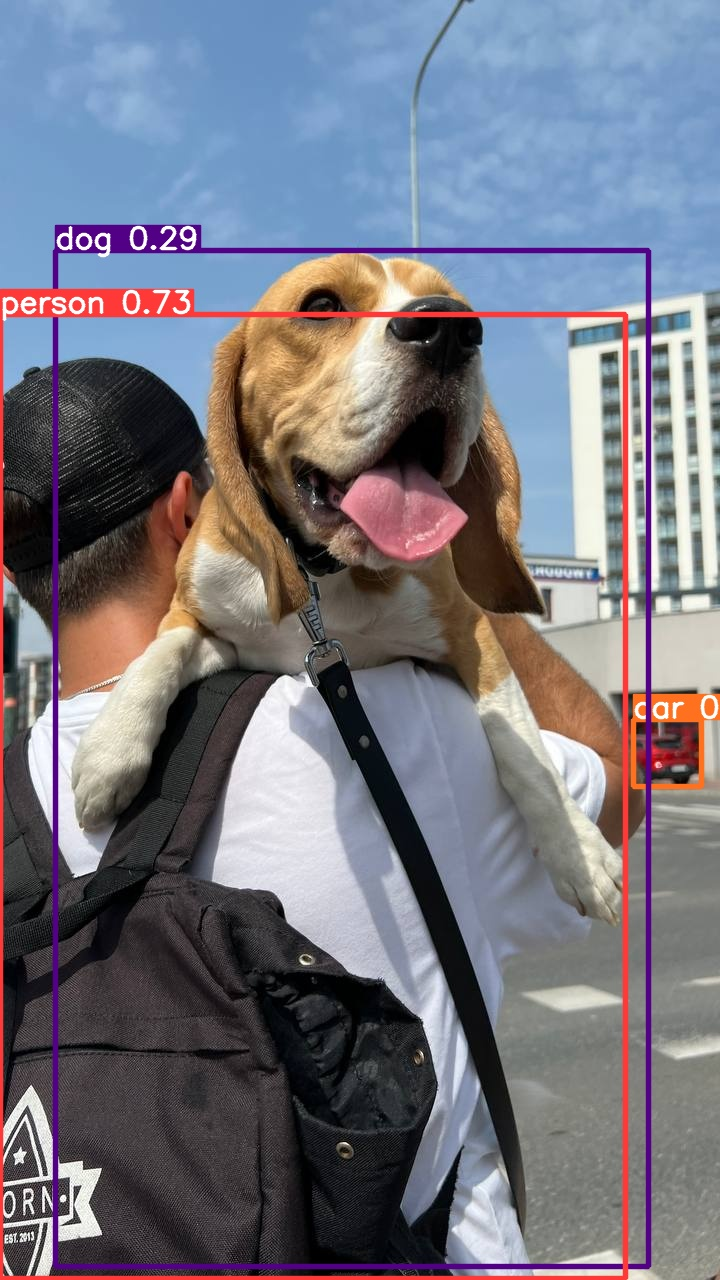

In [6]:
 %cd {HOME}
 Image(filename='runs/detect/predict/dog.jpeg',height=600)

## PYTHON SDK

In [7]:
model=YOLO(f'{HOME}/yolov8n.pt')
results=model.predict(source='https://img.freepik.com/free-photo/three-people-dog-standing-near-car-with-road-map_23-2148039047.jpg', conf=0.25)


100%|██████████| 101k/101k [00:00<00:00, 271kB/s] 
image 1/1 /content/three-people-dog-standing-near-car-with-road-map_23-2148039047.jpg: 448x640 4 persons, 1 car, 1 dog, 1 backpack, 112.8ms
Speed: 4.2ms preprocess, 112.8ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
 %cd {HOME}
 Image(filename='three-people-dog-standing-near-car-with-road-map_23-2148039047.jpg')

In [8]:
 %cd {HOME}
 !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0K2eOtjTG7i7eMF1yop7")
project = rf.workspace("wavelabs-1n4ki").project("emotiondetection-nlfsg")
dataset = project.version(1).download("yolov8")


/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e33b7e736a66dcc54a048c27e7705fc47e7ee0cdcdf5c829d9ed9bda2c278293
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.166, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to EmotionDetection-1 in yolov8:: 100%|██████████| 162/162 [00:00<00:00, 2121.48it/s]


In [10]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800

/content
Ultralytics YOLOv8.0.166 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/EmotionDetection-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [11]:
!ls {HOME}/runs/detect/train2

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1693374034.17dec9d92abe.2211.0  train_batch2.jpg
F1_curve.png					    train_batch360.jpg
labels_correlogram.jpg				    train_batch361.jpg
labels.jpg					    train_batch362.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    weights
results.csv


/content


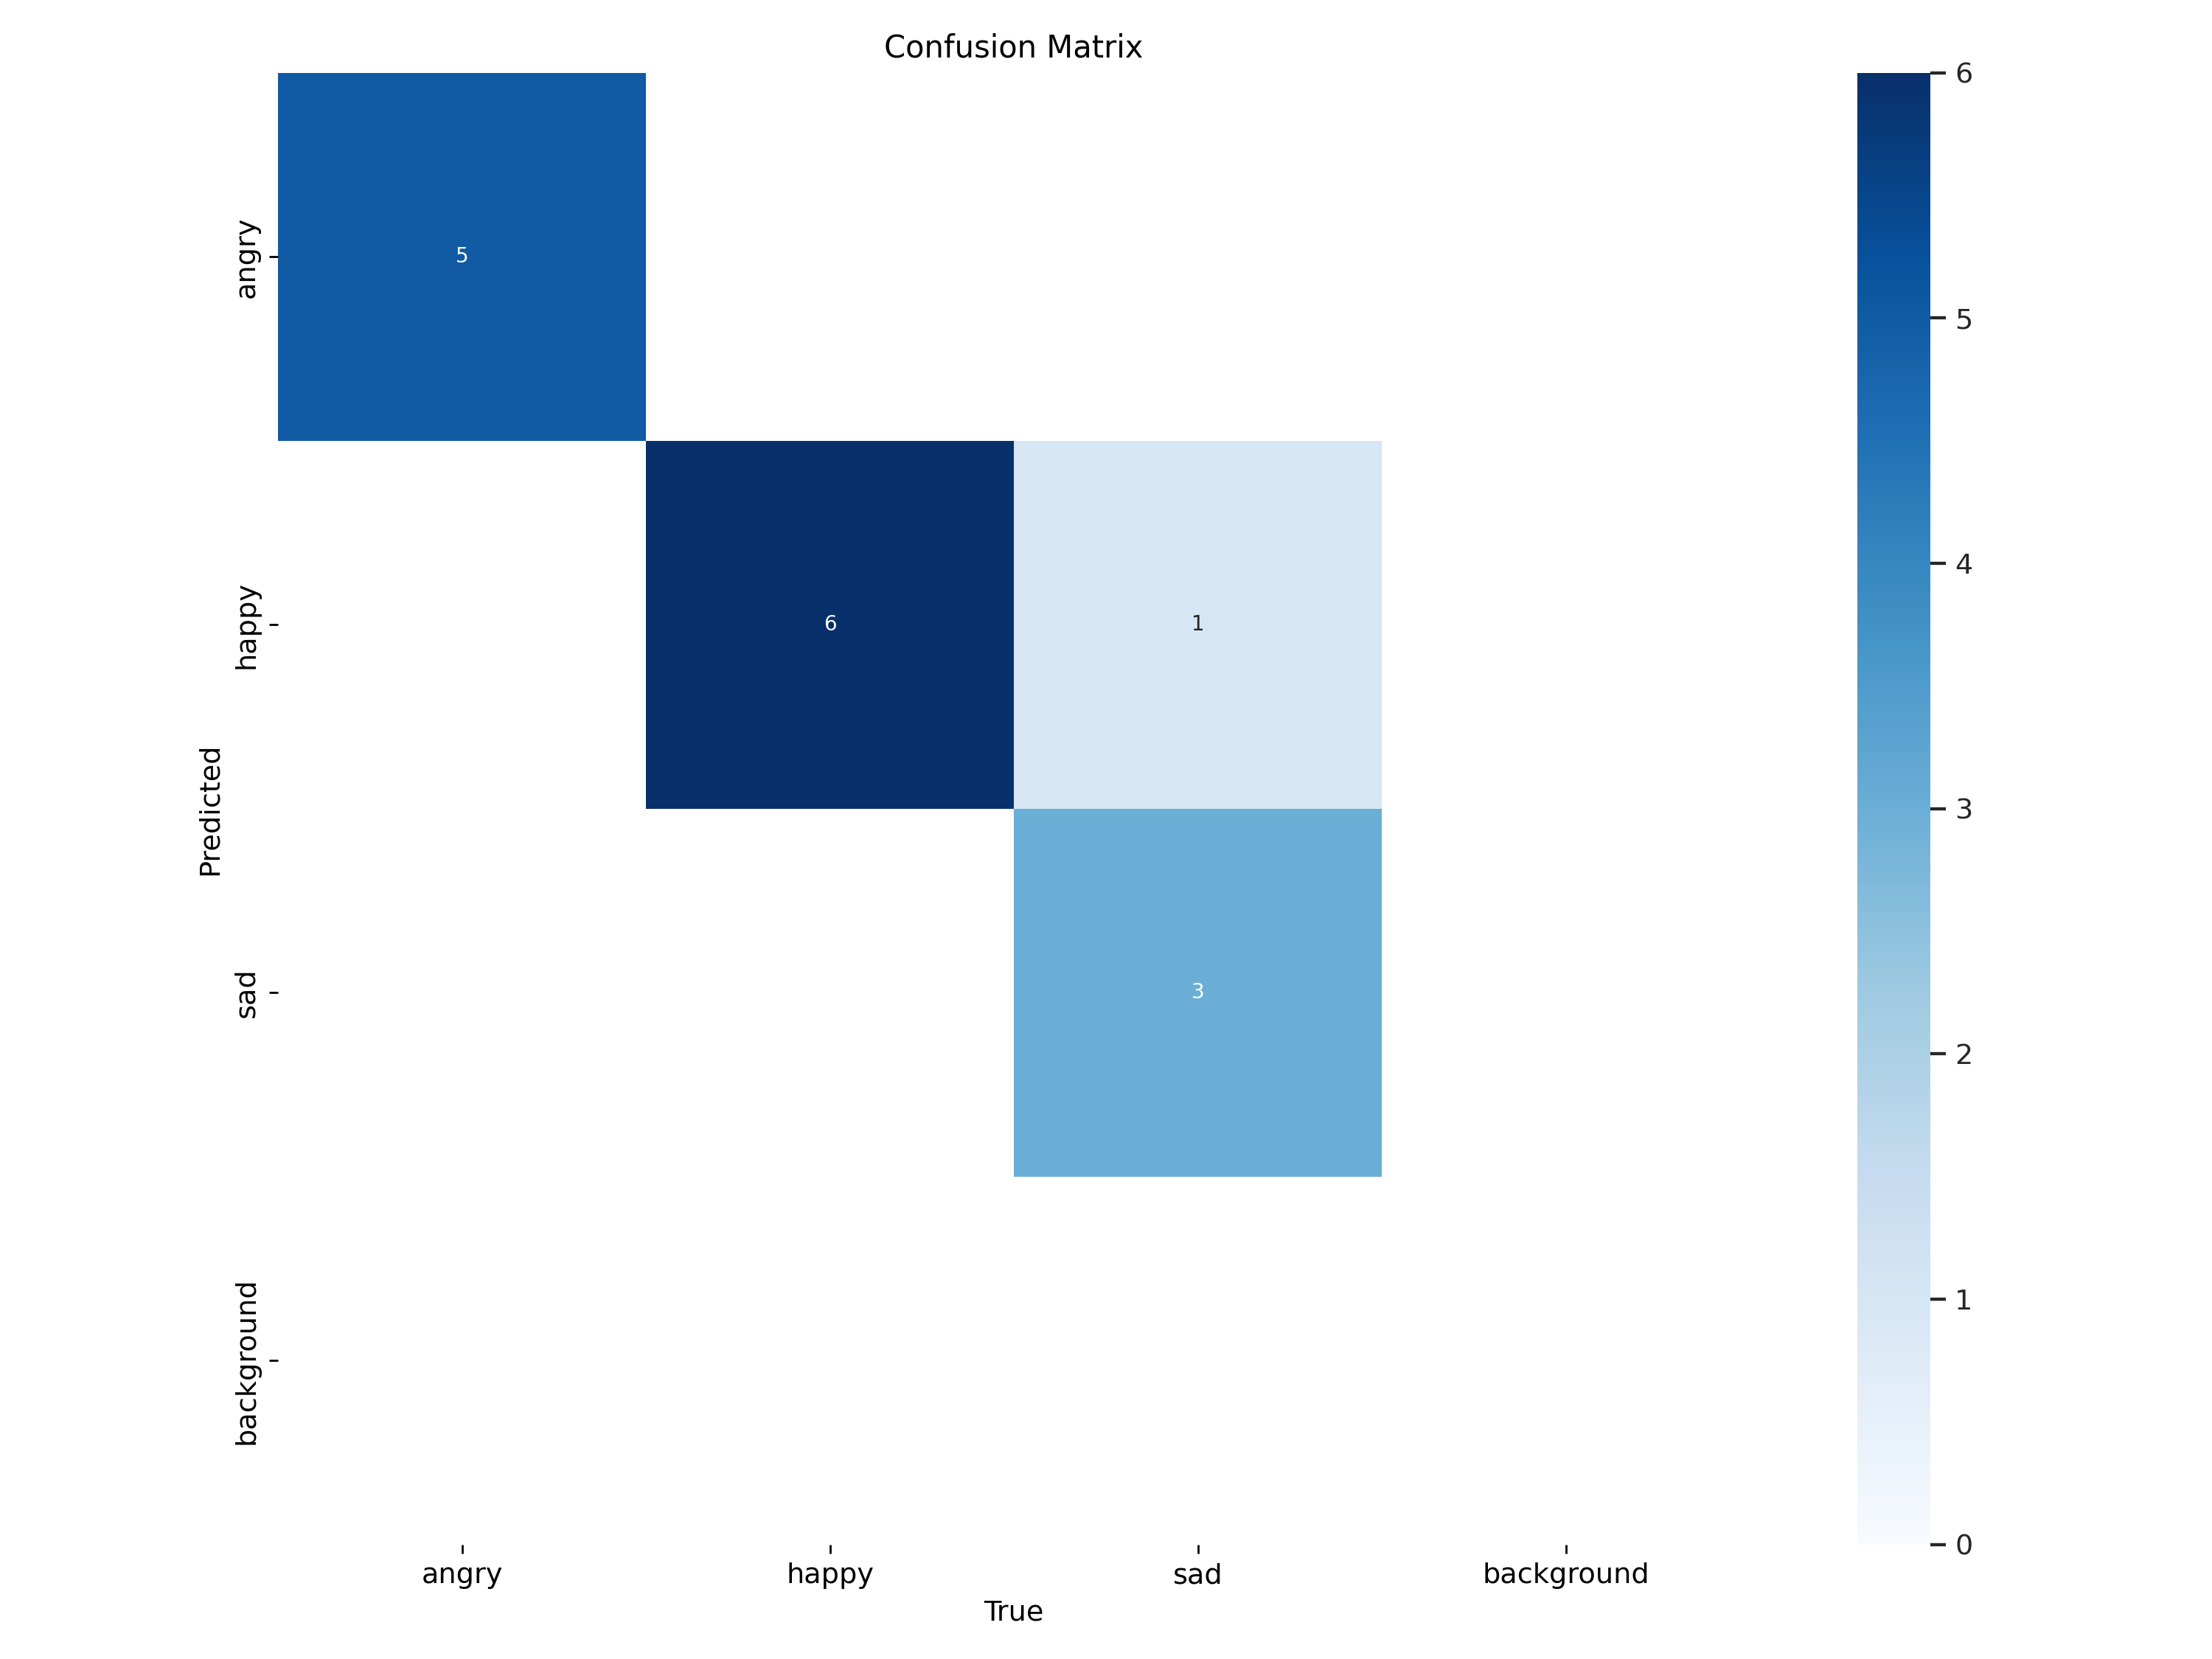

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png',width=600)

/content


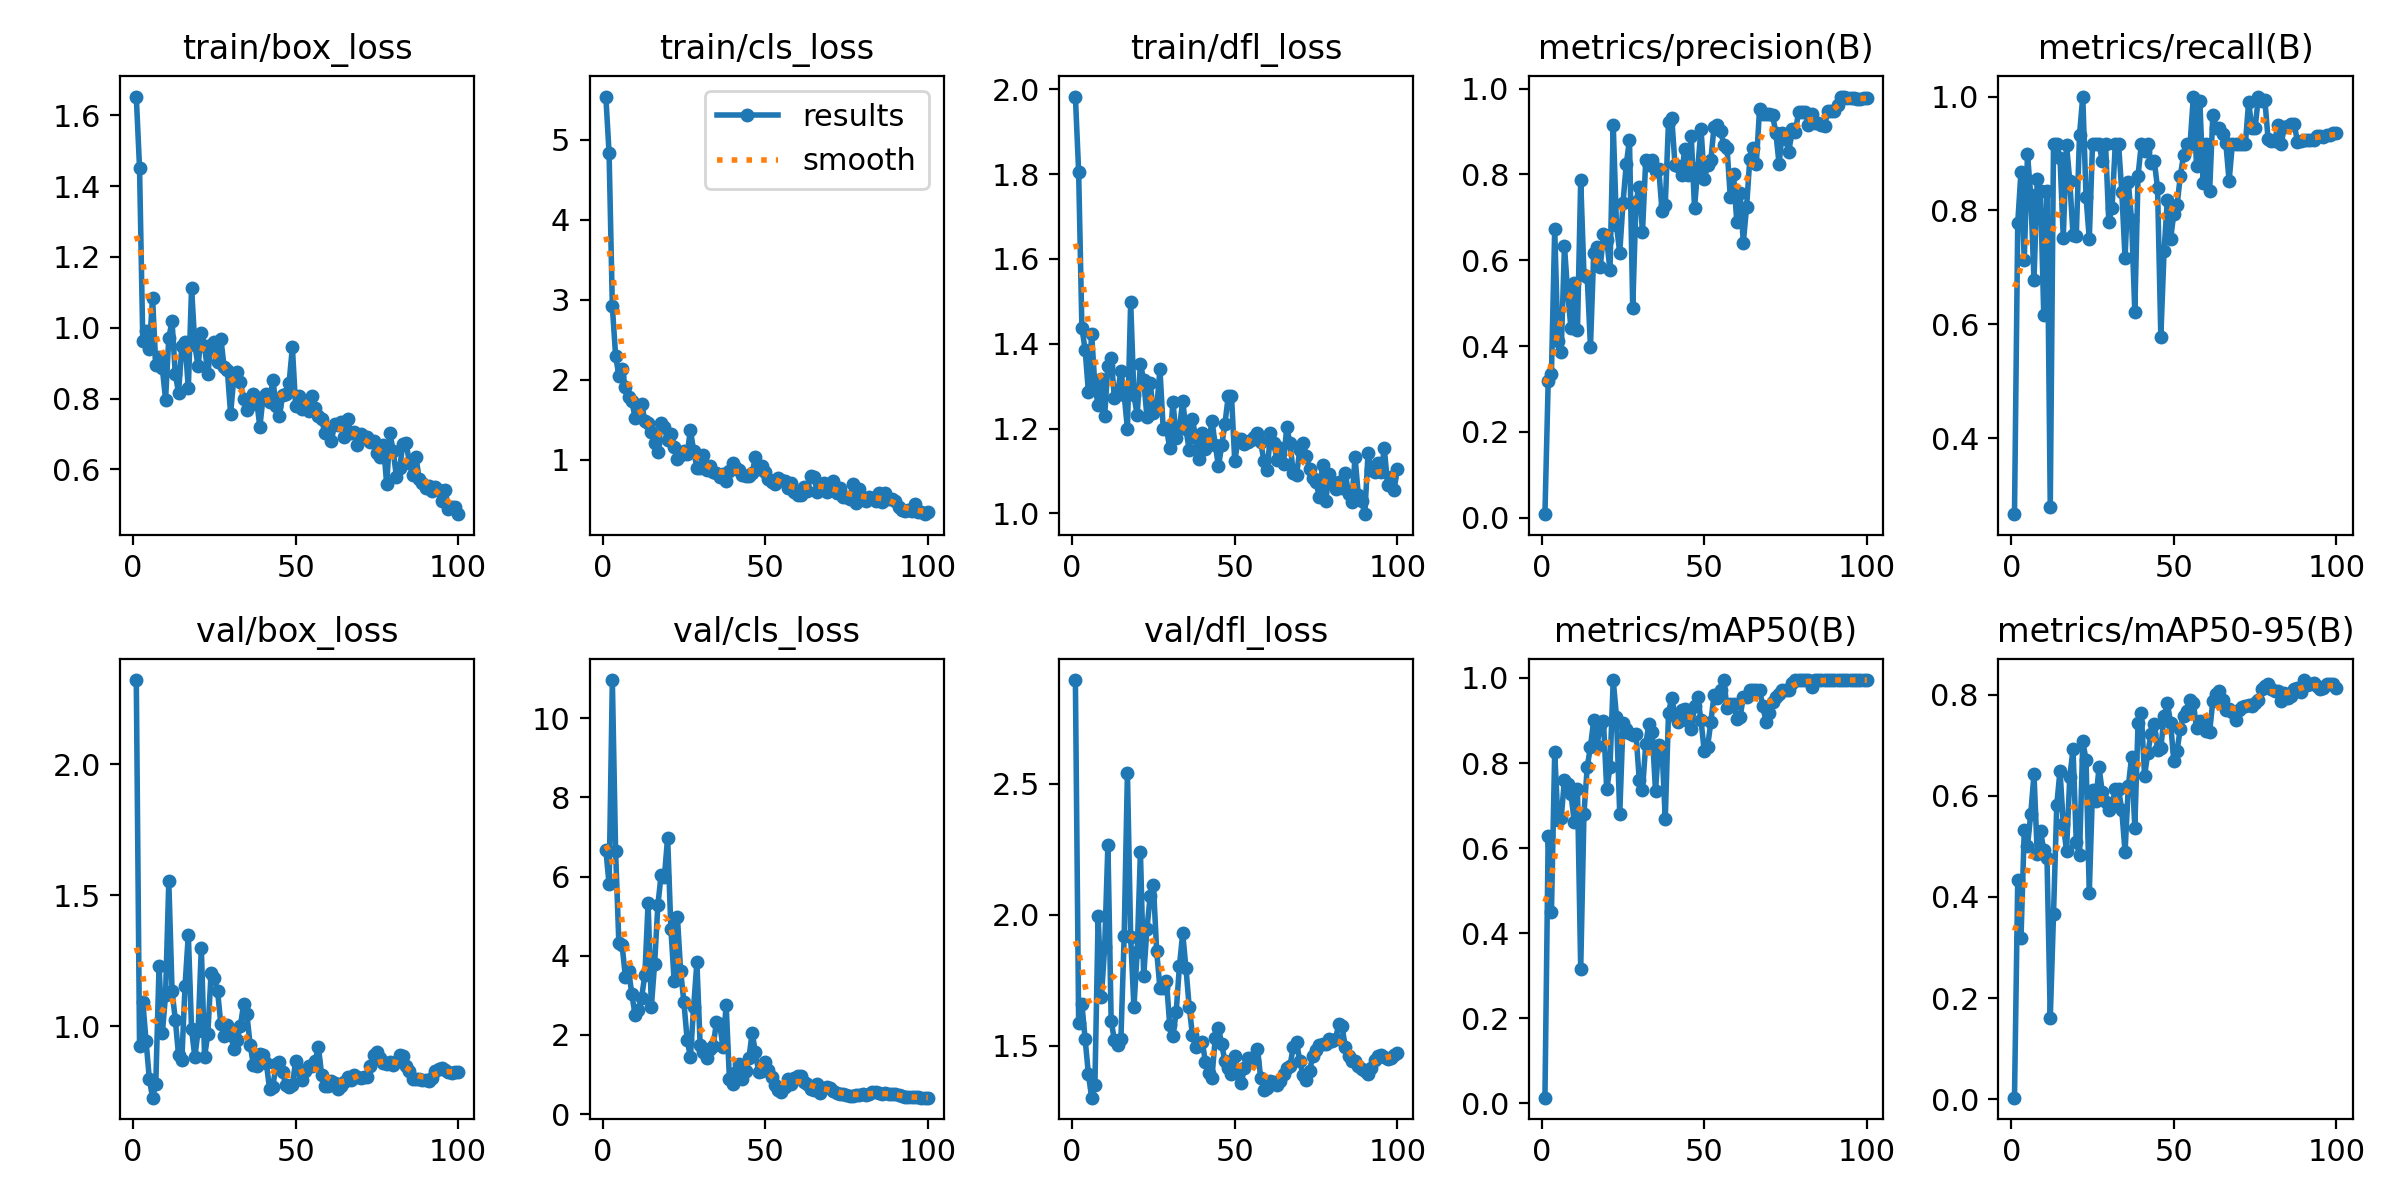

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [14]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.166 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients
val: Scanning /content/EmotionDetection-1/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.88it/s]
                   all         15         15      0.947      0.923      0.995      0.815
                 angry         15          5      0.985          1      0.995      0.884
                 happy         15          6      0.856          1      0.995      0.731
                   sad         15          4          1       0.77      0.995      0.831
Speed: 0.4ms preprocess, 17.4ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/val


In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.166 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients

image 1/7 /content/EmotionDetection-1/test/images/angry-4c4a8bf4-426a-11ee-8cef-8cc6813c7d45_jpg.rf.466beaee8d3794aa516610e7d7c8b8a2.jpg: 800x800 1 angry, 24.6ms
image 2/7 /content/EmotionDetection-1/test/images/angry-88779ea9-426a-11ee-8035-8cc6813c7d45_jpg.rf.0d37e969865a232cd469c328527598dd.jpg: 800x800 1 angry, 24.7ms
image 3/7 /content/EmotionDetection-1/test/images/happy-a6e23f8a-4269-11ee-94a7-8cc6813c7d45_jpg.rf.071d8e57beadbf85b74aa4899649dc32.jpg: 800x800 1 happy, 24.6ms
image 4/7 /content/EmotionDetection-1/test/images/happy-cafbe028-4269-11ee-8e31-8cc6813c7d45_jpg.rf.2e12f7b5eb48bc8b2cf60ab6d767ae2c.jpg: 800x800 1 happy, 24.6ms
image 5/7 /content/EmotionDetection-1/test/images/happy-cdfce5a8-4269-11ee-8fbf-8cc6813c7d45_jpg.rf.14741516db2b73b6a7313823a65dba7d.jpg: 800x800 1 happy, 24.6ms
image 6/7 /content/Emoti

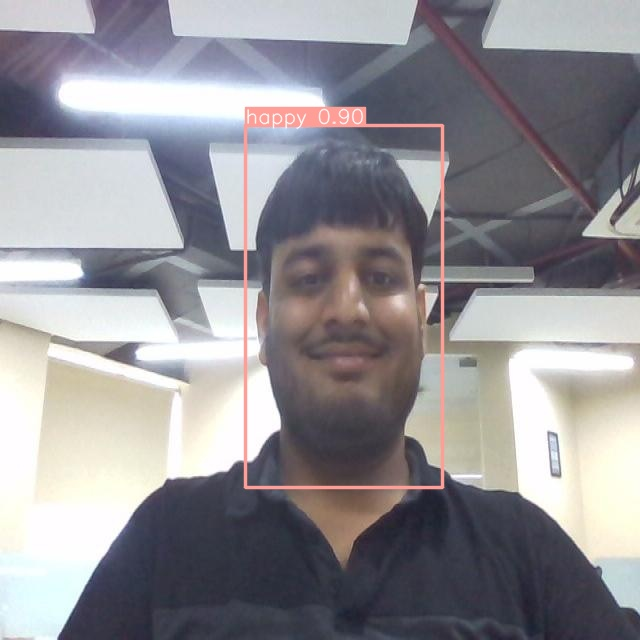

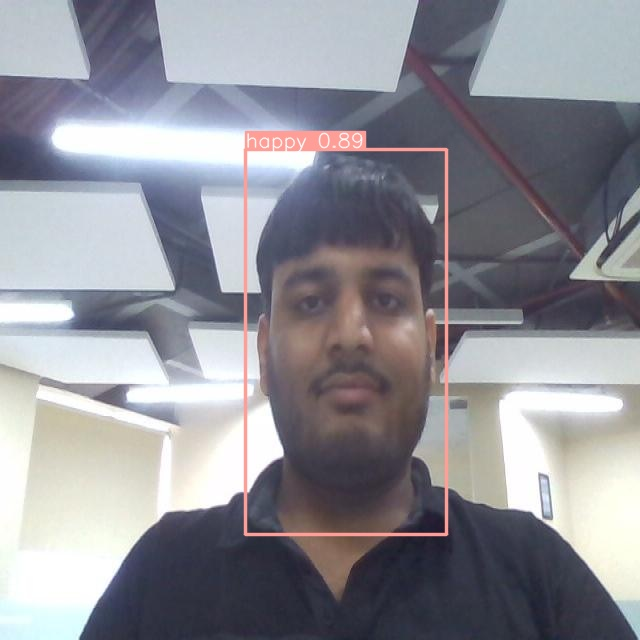

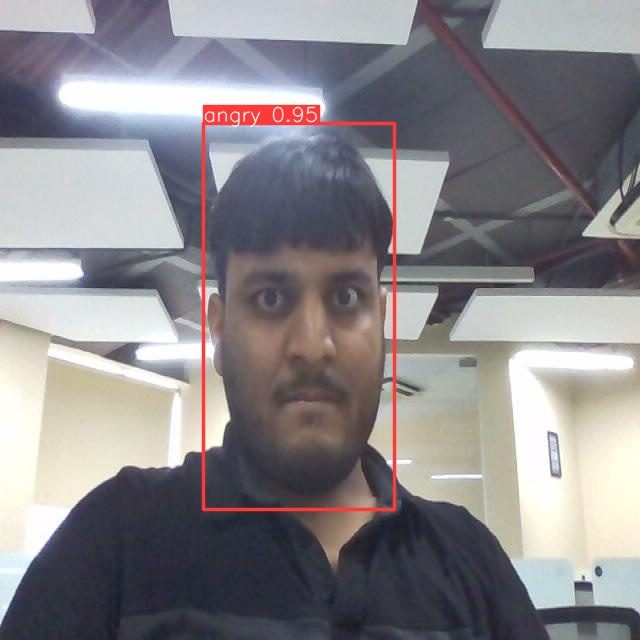

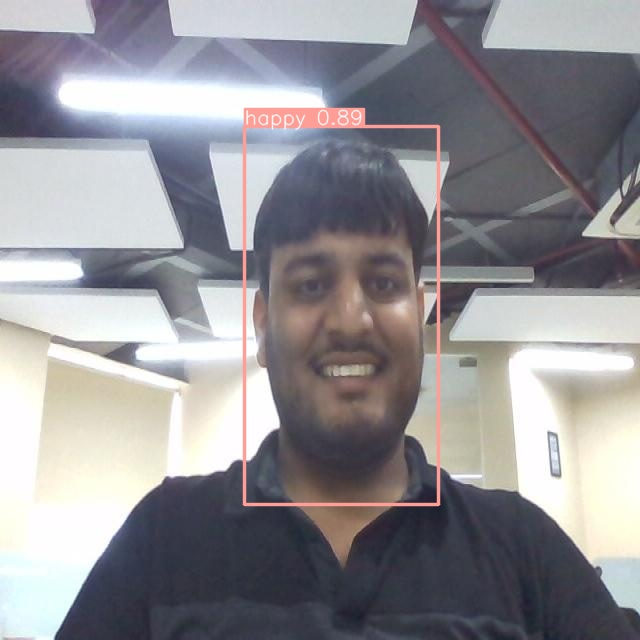

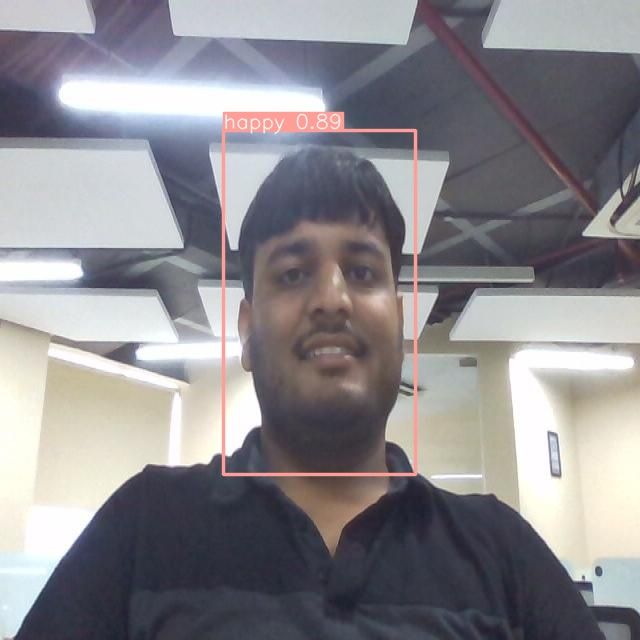

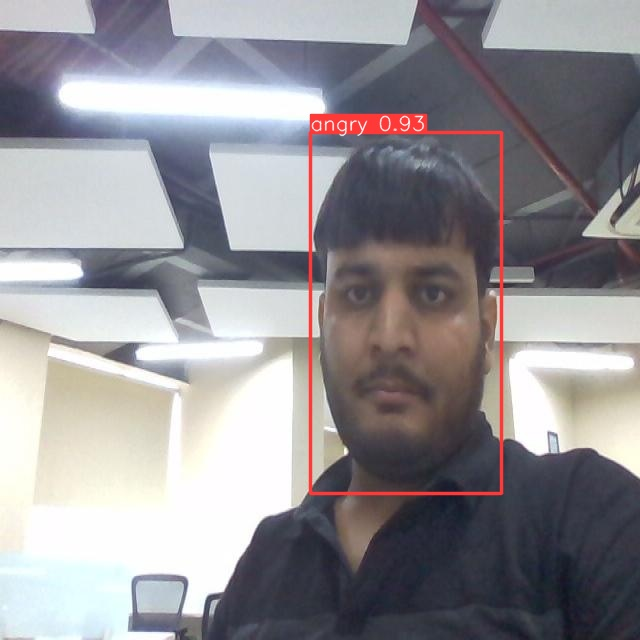

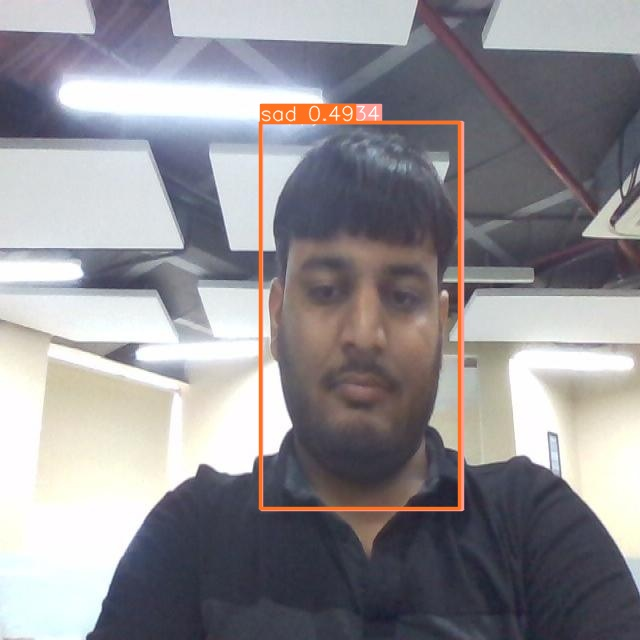

In [16]:
import glob
from IPython.display import Image,display
for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg'):
  display(Image(filename=image_path,width=400))
  print('\n')

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/WIN_20230828_13_39_42_Pro.mp4

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")


NameError: ignored